# Deep Learning Project

In [1]:
from src import train,evaluate,loss,preprocessed,model
import importlib


In [19]:
importlib.reload(train)
importlib.reload(evaluate)
importlib.reload(loss)
importlib.reload(preprocessed)
importlib.reload(model)

<module 'src.model' from 'c:\\Users\\coren\\Projet Deep Learning\\CS230\\src\\model.py'>

## I- Download and process the data

In [8]:
years = ['2011','2012','2013','2014','2015']
for year in years:
    preprocessed.process_raw_data(year,sampling_method='NearMiss')
    print(f"the dataset for {year} is done.")

the dataset for 2011 is done.
the dataset for 2012 is done.
the dataset for 2013 is done.
the dataset for 2014 is done.
the dataset for 2015 is done.


## II- Testing Model

### 1- Logistic Regression

In [ ]:
hyperparameters = {'penality' : None,
                   'solver' : 'lbfgs',
                   'epoch' : 1000}

c:\Users\coren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy train: 0.7591
Accuracy test: 0.7407
F1 Score train: 0.7656
F1 Score test: 0.4470


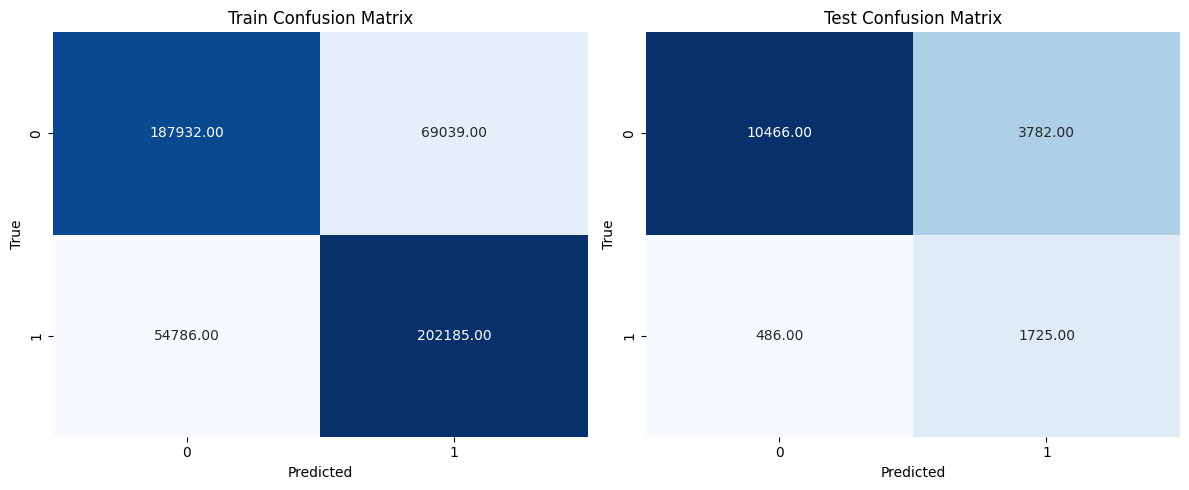

c:\Users\coren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy train: 0.7454
Accuracy test: 0.7280
F1 Score train: 0.7497
F1 Score test: 0.4181


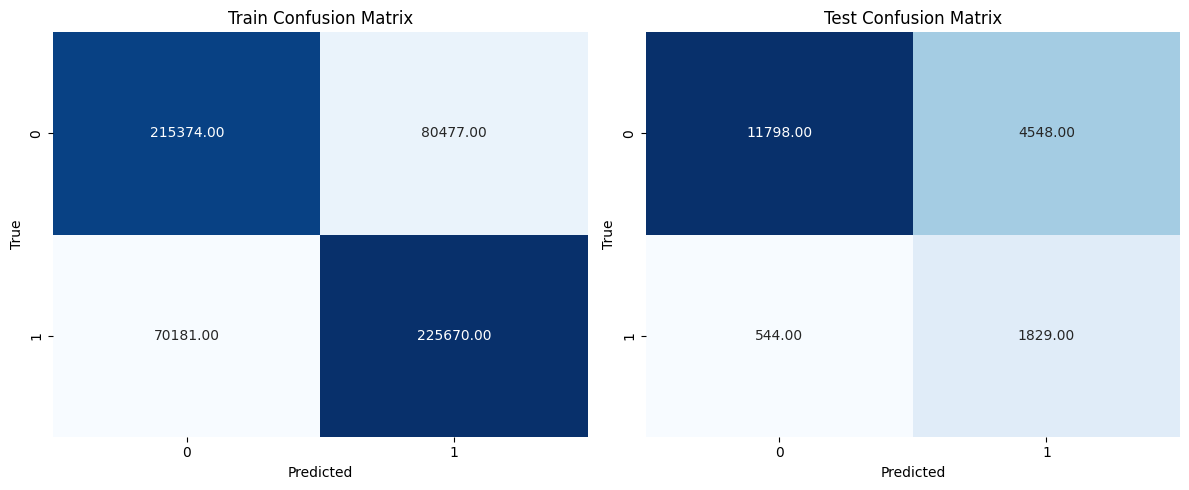

c:\Users\coren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy train: 0.7575
Accuracy test: 0.7373
F1 Score train: 0.7645
F1 Score test: 0.4506


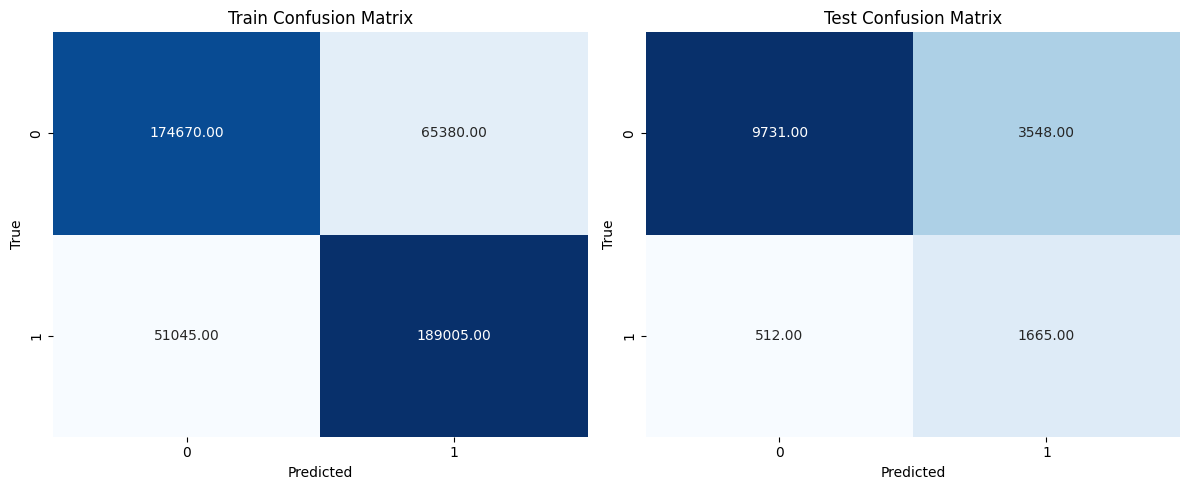

c:\Users\coren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy train: 0.7430
Accuracy test: 0.7303
F1 Score train: 0.7478
F1 Score test: 0.4089


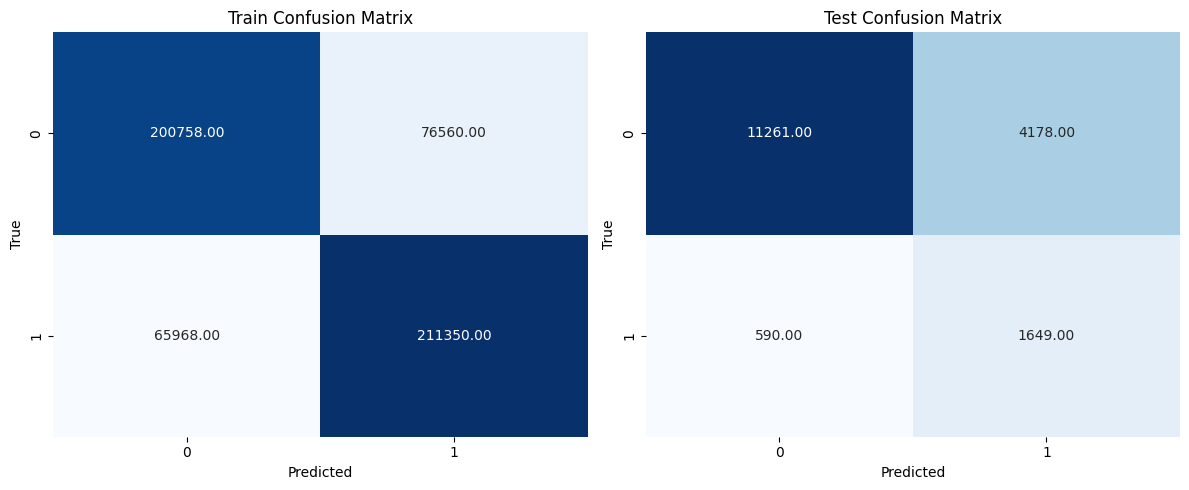

c:\Users\coren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy train: 0.7525
Accuracy test: 0.7232
F1 Score train: 0.7593
F1 Score test: 0.4439


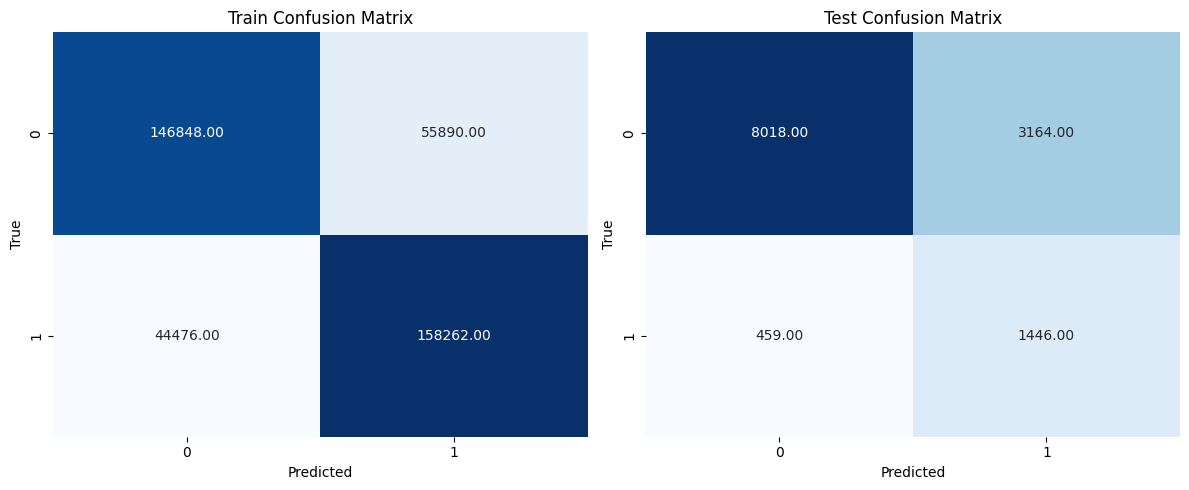

In [20]:
dict_model_logistic = {}
for year in years :
    X_train,Y_train = preprocessed.get_data(year,'Smote',data = 'train')
    X_test,Y_test = preprocessed.get_data(year,'Smote',data = 'test')
    model_logistic,X_train,X_test = train.train_logistic(X_train,Y_train,X_test,Y_test,hyperparameters)
    evaluate.evaluate_model(model_logistic,X_train,Y_train,X_test,Y_test)
    dict_model_logistic[year] = model_logistic
    

### 2- Neural Network

In [12]:
hyperparameters =  {'batch_size' : 64,
                    'optimizer' : 'adam',
                    'learning_rate' : 0.001,
                    'epochs' : 10,
                    'loss' : 'binary_crossentropy'}

hidden_layers = [100,100,100,20]

Epoch 1/10
8031/8031 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.7390 - loss: 0.5278 - val_accuracy: 0.7430 - val_loss: 0.4696
Epoch 2/10
8031/8031 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.7638 - loss: 0.4878 - val_accuracy: 0.6997 - val_loss: 0.5585
Epoch 3/10
8031/8031 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.7841 - loss: 0.4573 - val_accuracy: 0.7217 - val_loss: 0.5347
Epoch 4/10
8031/8031 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.8068 - loss: 0.4101 - val_accuracy: 0.8268 - val_loss: 0.3557
Epoch 5/10
8031/8031 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8174 - loss: 0.3852 - val_accuracy: 0.7878 - val_loss: 0.4299
Epoch 6/10
8031/8031 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.8245 - loss: 0.3677 - val_accuracy: 0.7844 - val_loss: 0.4173
Epoch 7/10
8031/8031 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8283 - loss: 0.3574 - val_accuracy: 0.7901 - val_loss: 0.4060
Epoch 8/10
8031/8031 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8310 - loss: 0

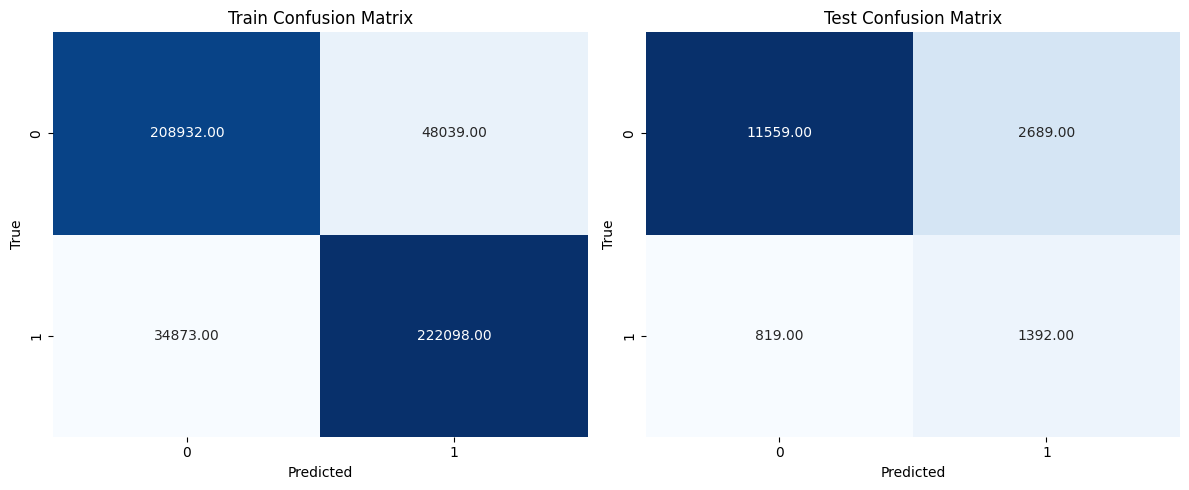

Epoch 1/10
9246/9246 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.7269 - loss: 0.5495 - val_accuracy: 0.6793 - val_loss: 0.5523
Epoch 2/10
9246/9246 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.7563 - loss: 0.4976 - val_accuracy: 0.7269 - val_loss: 0.5059
Epoch 3/10
9246/9246 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.7748 - loss: 0.4594 - val_accuracy: 0.7446 - val_loss: 0.4816
Epoch 4/10
9246/9246 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - accuracy: 0.7842 - loss: 0.4379 - val_accuracy: 0.7753 - val_loss: 0.4263
Epoch 5/10
9246/9246 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - accuracy: 0.7909 - loss: 0.4223 - val_accuracy: 0.7469 - val_loss: 0.4472
Epoch 6/10
9246/9246 ━━━━━━━━━━━━━━━━━━━━ 37s 4ms/step - accuracy: 0.7953 - loss: 0.4109 - val_accuracy: 0.7817 - val_loss: 0.4046
Epoch 7/10
9246/9246 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - accuracy: 0.7973 - loss: 0.4046 - val_accuracy: 0.7655 - val_loss: 0.4490
Epoch 8/10
9246/9246 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7999 - loss: 0

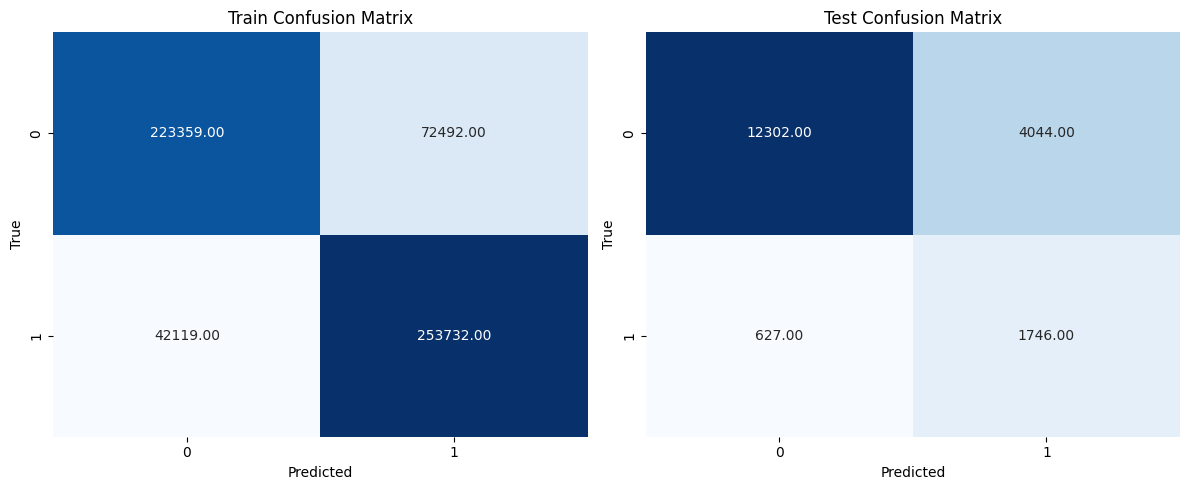

Epoch 1/10
7502/7502 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.7333 - loss: 0.5400 - val_accuracy: 0.7272 - val_loss: 0.4899
Epoch 2/10
7502/7502 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7609 - loss: 0.4932 - val_accuracy: 0.7052 - val_loss: 0.5313
Epoch 3/10
7502/7502 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - accuracy: 0.7804 - loss: 0.4645 - val_accuracy: 0.7599 - val_loss: 0.4730
Epoch 4/10
7502/7502 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - accuracy: 0.7994 - loss: 0.4261 - val_accuracy: 0.7830 - val_loss: 0.4370
Epoch 5/10
7502/7502 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.8106 - loss: 0.3993 - val_accuracy: 0.7890 - val_loss: 0.4240
Epoch 6/10
7502/7502 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.8201 - loss: 0.3769 - val_accuracy: 0.7963 - val_loss: 0.4202
Epoch 7/10
7502/7502 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.8271 - loss: 0.3607 - val_accuracy: 0.8137 - val_loss: 0.3918
Epoch 8/10
7502/7502 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.8309 - loss: 0

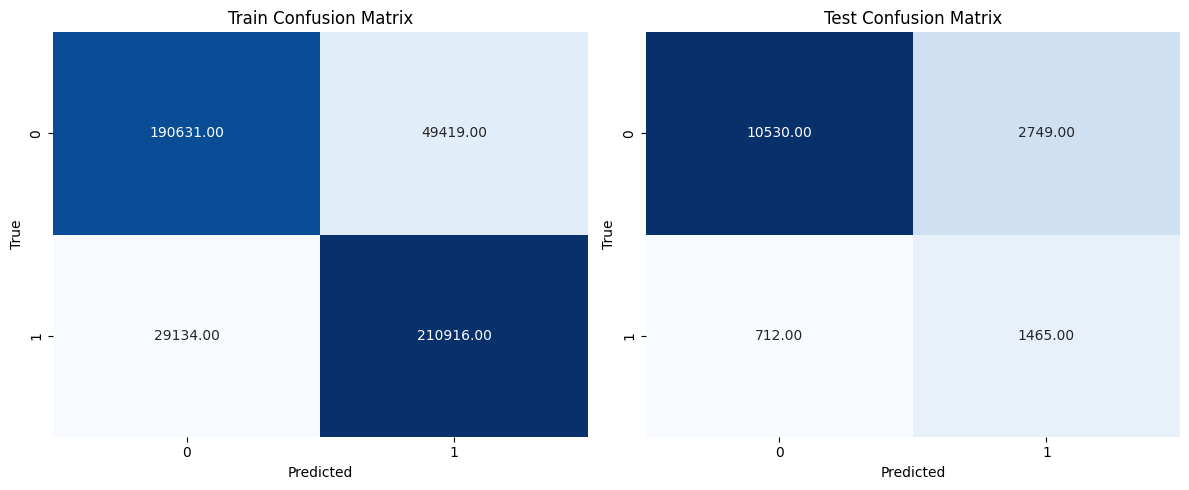

Epoch 1/10
8667/8667 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.7259 - loss: 0.5434 - val_accuracy: 0.6872 - val_loss: 0.5546
Epoch 2/10
8667/8667 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.7482 - loss: 0.5076 - val_accuracy: 0.7426 - val_loss: 0.4792
Epoch 3/10
8667/8667 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.7609 - loss: 0.4865 - val_accuracy: 0.7527 - val_loss: 0.4575
Epoch 4/10
8667/8667 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.7740 - loss: 0.4598 - val_accuracy: 0.7641 - val_loss: 0.4536
Epoch 5/10
8667/8667 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.7830 - loss: 0.4387 - val_accuracy: 0.7500 - val_loss: 0.4719
Epoch 6/10
8667/8667 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.7894 - loss: 0.4231 - val_accuracy: 0.7697 - val_loss: 0.4599
Epoch 7/10
8667/8667 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7932 - loss: 0.4131 - val_accuracy: 0.7762 - val_loss: 0.4444
Epoch 8/10
8667/8667 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - accuracy: 0.7974 - loss: 0

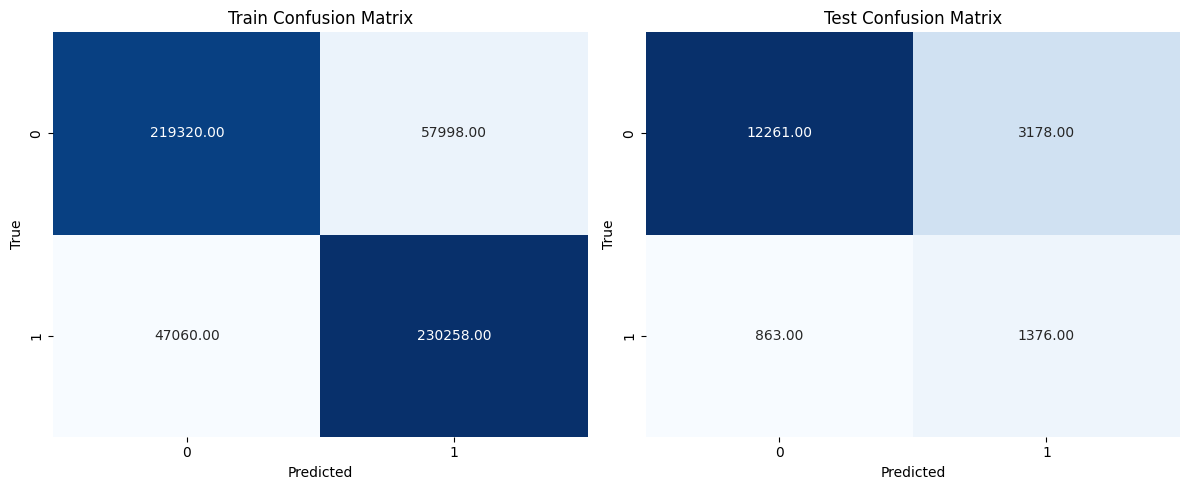

Epoch 1/10
6336/6336 ━━━━━━━━━━━━━━━━━━━━ 36s 5ms/step - accuracy: 0.7291 - loss: 0.5828 - val_accuracy: 0.6439 - val_loss: 0.6138
Epoch 2/10
6336/6336 ━━━━━━━━━━━━━━━━━━━━ 46s 6ms/step - accuracy: 0.7592 - loss: 0.4955 - val_accuracy: 0.7371 - val_loss: 0.4797
Epoch 3/10
6336/6336 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - accuracy: 0.7744 - loss: 0.4747 - val_accuracy: 0.7400 - val_loss: 0.5141
Epoch 4/10
6336/6336 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.7940 - loss: 0.4364 - val_accuracy: 0.7252 - val_loss: 0.5181
Epoch 5/10
6336/6336 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8030 - loss: 0.4130 - val_accuracy: 0.7474 - val_loss: 0.5019
Epoch 6/10
6336/6336 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - accuracy: 0.8116 - loss: 0.3957 - val_accuracy: 0.7932 - val_loss: 0.4240
Epoch 7/10
6336/6336 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.8218 - loss: 0.3742 - val_accuracy: 0.7896 - val_loss: 0.4318
Epoch 8/10
6336/6336 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8281 - loss: 0

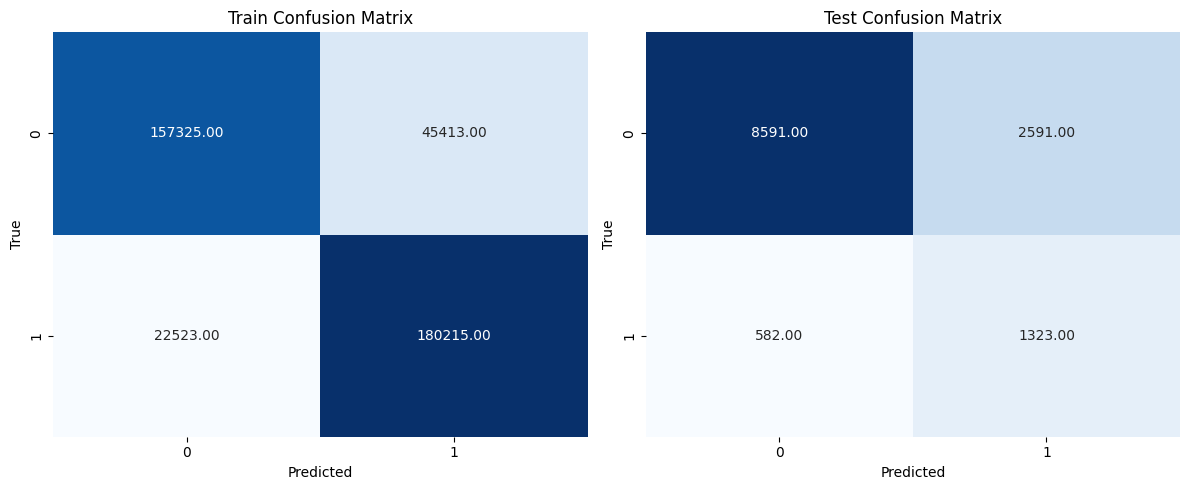

In [17]:
dict_model = {}
for year in years :
    X_train,Y_train = preprocessed.get_data(year,'Smote',data = 'train')
    X_test,Y_test = preprocessed.get_data(year,'Smote',data = 'test')
    num_input = X_train.shape[1]
    model_year = model.create_sequential_model(num_input,hidden_layers,dropout_rates=0.0,l1_rate=0.0,l2_rate=0.0)
    train.train_model(X_train,Y_train,X_test,Y_test,model_year,hyperparameters)
    evaluate.evaluate_model(model_year,X_train,Y_train,X_test,Y_test)
    dict_model[year] = model_year